In [1]:
 #DECOUVERTES DES DONNEES

In [109]:
import sys
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [38]:
import os # pour la manipulation des fichiers 
import pandas as pd # pour la gestion des donnees 
import matplotlib.pyplot as plt # pour la visualisation des données
import seaborn as sns # pour la visualisation

In [40]:
#Collectes et visualisation de ma liste de ma liste de donnees 
donnees=[file for file in os.listdir(r'E:\Formations\Jeu_Donnees') ]
for file in donnees:
  print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [41]:
# regroupement de mes donnees dans un dataset ou jeu de donnees 
path=r'E:\Formations\Jeu_Donnees'
all_data=pd.DataFrame() ## base de donnees crees
for file in donnees:
    current_data=pd.read_csv(path+'/'+file)
    all_data= pd.concat([all_data,current_data])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [42]:
all_data.to_csv(path+'/all_data.csv', index=False)# Depot de mes donnees dans depot de references..index false pour ne pas generer d autres d index

In [43]:
all_data.dtypes #exploration des types de chaques colonnes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [44]:
all_data.isnull().sum()#Exploration des valeurs Nulles et manquantes

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [45]:
all_data=all_data.dropna(how='all')#Suppression des valeurs manquantes
all_data.shape

(186305, 6)

In [ ]:
#Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d affaire?

In [46]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [47]:
# ecriture et Appel de la fonction d'extraction du mois
def month(x):
     return x.split('/')[0]# Instructions qui divise la valeur en plusieurs  elements

#month('04/19/19 08:46')

In [48]:
#Recuperation de la valeur mois dans le jeu de donnees 
all_data.loc[:, 'Mois']=all_data['Order Date'].apply(month)
all_data.head()

C:\Users\FTAB TECH\AppData\Local\Temp\ipykernel_26012\3243477097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:, 'Mois']=all_data['Order Date'].apply(month)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mois
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [49]:
all_data['Mois'].unique() #Visualisation des valeurs uniques

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [50]:
#Nettoyage des valeurs uniques notament des Oder Date
all_data=all_data[all_data['Mois']!='Order Date']
all_data['Mois'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [51]:
#Changement du type de donnees Mois en Integer
all_data["Mois"]=all_data['Mois'].astype(int)
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Mois                 int32
dtype: object

In [52]:
print(all_data.columns) #Affiche l'ensemble des colonne

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Mois'],
      dtype='object')


In [56]:
#Changement ou conversion de valeurs vers les types
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Mois                  int32
dtype: object

In [59]:
#creation de lonne de ventes par mois
all_data['VenteActif']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mois,VenteMois,VenteActif
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99


In [62]:
#Suppression de la colonne Vente Mois
#all_data.drop('VenteMois', axis=1, inplace=True )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mois,VenteActif
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [63]:
#Regroupement des ventes total par Mois et presentation du graphique en Bar du Mois avec les meilleurs ventes
all_data.groupby('Mois')['VenteActif'].sum()

Mois
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: VenteActif, dtype: float64

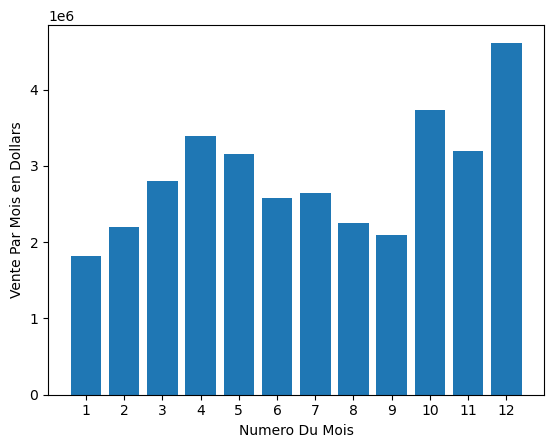

In [64]:
#Organisation des mois dans une variable Months
Months= range(1,13)
plt.bar(Months, all_data.groupby('Mois')['VenteActif'].sum())
plt.xticks(Months)
plt.ylabel('Vente Par Mois en Dollars')
plt.xlabel('Numero Du Mois')
plt.show()

In [65]:
#Vsiualisation de la ville avec les meilleures ventes
def ville(x):
    return x.split(',')[1]
all_data['Ville']= all_data['Purchase Address'].apply(ville)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mois,VenteActif,Ville
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [66]:
all_data.groupby('Ville')['Ville'].count() # Il compte le nombre de commandes par ville

Ville
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: Ville, dtype: int64

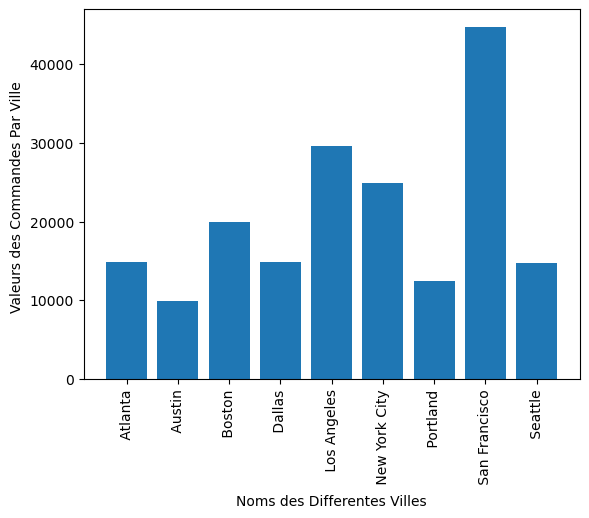

In [67]:
#Affichages de la visualisatioin
plt.bar(all_data.groupby('Ville')['Ville'].count().index, all_data.groupby('Ville')['Ville'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Valeurs des Commandes Par Ville ')
plt.xlabel ('Noms des Differentes Villes')
plt.show()

In [ ]:
#En Quelle moment doit on faire une campagne publicitaire pour avoir plus de ventes?

In [69]:
#Nous allons extraire l'heure ou les commandes se font le plus afin de programmer des campagnes
all_data['Heure']=pd.to_datetime(all_data['Order Date']).dt.hour
all_data


C:\Users\FTAB TECH\AppData\Local\Temp\ipykernel_26012\1913984043.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Heure']=pd.to_datetime(all_data['Order Date']).dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mois,VenteActif,Ville,Heure
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


Text(0.5, 0, 'Heure de la Journée ')

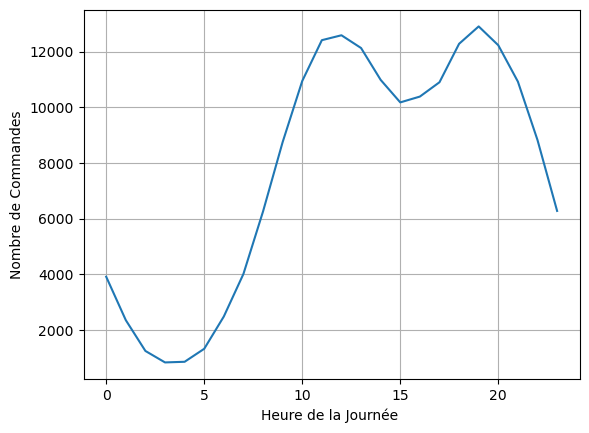

In [75]:
#extraction des valeurs lier a la commande des heures
Keys=[]
Hours=[]
for key, hour in all_data.groupby('Heure'):
    Keys.append(key)
    Hours.append(len(hour))

plt.grid()
plt.plot(Keys, Hours)
plt.ylabel('Nombre de Commandes')
plt.xlabel('Heure de la Journée ')


In [ ]:
# on va visualiser les quantites de produits les plus vendues

<Axes: xlabel='Product'>

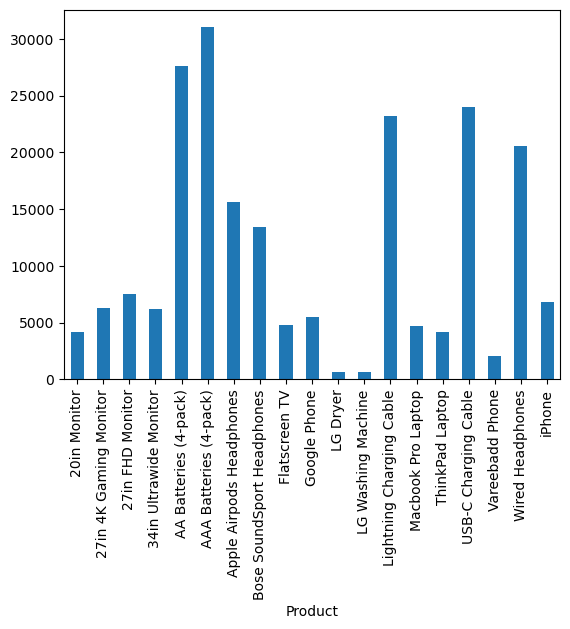

In [79]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar') # Autre facon d'afficher un diagramme en Bar

In [82]:
#Pourquoi ces produits se vendent le plus? 
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [84]:
#Visualisation et interpretation du prix sur la quantite vendue
Produits=all_data.groupby('Product')['Quantity Ordered'].sum().index
Quantity= all_data.groupby('Product')['Quantity Ordered'].sum()
Prix=all_data.groupby('Product')['Price Each'].mean()

C:\Users\FTAB TECH\AppData\Local\Temp\ipykernel_26012\3571619321.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe1.set_xticklabels(Produits, rotation='vertical', size=9)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

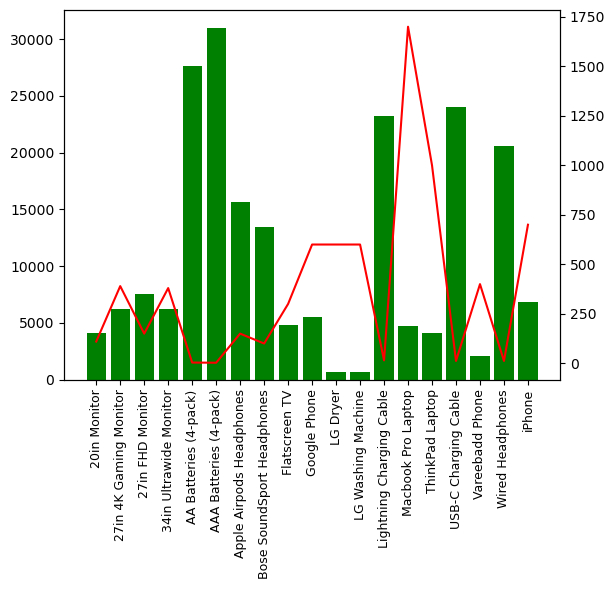

In [90]:
plt.figure(figsize=(40,24))
fig,axe1=plt.subplots()
axe2=axe1.twinx()
axe1.bar(Produits, Quantity, color='g')
axe2.plot(Produits, Prix, color='r')
axe1.set_xticklabels(Produits, rotation='vertical', size=9)

In [99]:
# Visualisation des combinaisons de produits les plus vendues 
# 1. recuperation des commandes par ordre de commandes de facon globales de la liste des fichiers
df=all_data[all_data['Order ID'].duplicated(keep=False)]
#df[0:15]
df['Groupe_Vente']=df.groupby('Order ID')['Product'].transform(lambda x : ','. join(x))

C:\Users\FTAB TECH\AppData\Local\Temp\ipykernel_26012\2747975144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Groupe_Vente']=df.groupby('Order ID')['Product'].transform(lambda x : ','. join(x))


In [100]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mois,VenteActif,Ville,Heure,Groupe_Vente
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [104]:
#Supprssion des doublons de commandes
df2=df.drop_duplicates(subset=['Order ID'])
df2

,Quantity Ordered,Price Each,Mois,VenteActif,Heure
count,7136.000000,7136.000000,7136.000000,7136.000000,7136.000000
mean,1.062360,402.439587,7.003083,403.453337,14.467769
std,0.330901,328.593499,3.503806,330.082406,5.436060
min,1.000000,2.990000,1.000000,2.990000,0.000000
25%,1.000000,14.950000,4.000000,14.950000,11.000000
50%,1.000000,400.000000,7.000000,400.000000,15.000000
75%,1.000000,700.000000,10.000000,700.000000,19.000000
max,7.000000,1700.000000,12.000000,3400.000000,23.000000


<Axes: ylabel='count'>

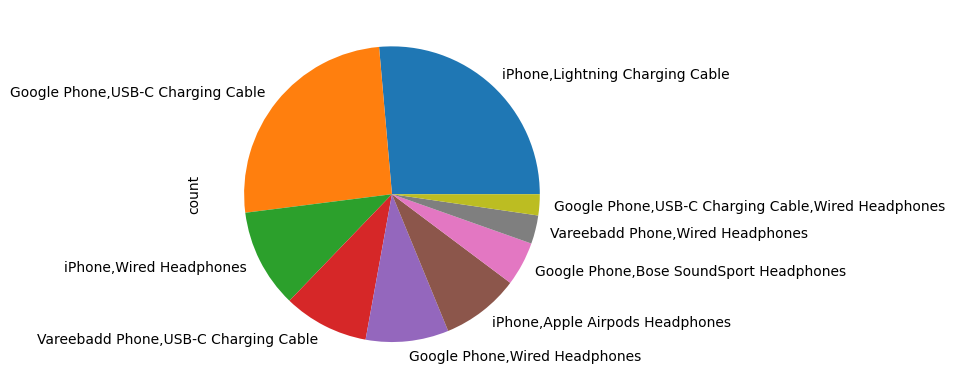

In [108]:
df2['Groupe_Vente'].value_counts()[0:9].plot.pie()